In [2]:
from math import *
import netCDF4 as nc

import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt

nx = 1440
ny = 720

dset = nc.Dataset("first_pass.nc", "r")
lons = dset.variables['lon'][:]
lats = dset.variables['lat'][:]
mean = dset.variables['sumx1'][:,:]
mean2 = dset.variables['sumx2'][:,:]
mean3 = dset.variables['sumx3'][:,:]
mean4 = dset.variables['sumx4'][:,:]
meanxt = dset.variables['sumxt'][:,:]
meant2 = dset.variables['sumt2'][:,:]
sumt = 182.0 #from 1 yr
days = 365

print("mean ",mean.max(), mean.min() )
print("mean2 ",mean2.max(), mean2.min() )
print("mean3 ",mean3.max(), mean3.min() )
print("mean4 ",mean4.max(), mean4.min() )
print("meanxt ",meanxt.max(), meanxt.min() )
print("meant2 ",meant2.max(), meant2.min() )

mean1 = mean

mean  30.084437670773024 -1.7456438015585076
mean2  905.5701578218643 0.0
mean3  27273.532459332193 -5.354178238568241
mean4  821865.048630137 0.0
meanxt  5521.012710811668 -318.61629605489236
meant2  44226.0 0.0


mask count  0
[     0      0  74557  49337  21350  12852 354931   9730   7857   6708
   6118   5823   5808   5977   6433   6432   7031   7618   6778   7774
   6697   6928   6807   6667   7128   6254   5910   5722   5526   5262
   5337   5055   5108   5224   5727   6273   6205   6148   5923   6050
   6665   7612   7289   7162   7653   7960   8492   8791   8957   8591
   9289   9429   9609  10310  11202  11191  12941  15225  17093  22274
  25545  28100  21171  17964  10210   2986     24      0      0      0
      0      0      0      0      0      0      0      0      0      0]
[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5
  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5
 11.  11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5
 18.  18.5 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5
 25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5
 32.  32.5 33.  33.5 34.  34.5 35.  35.5 36.  36.5 37. ]


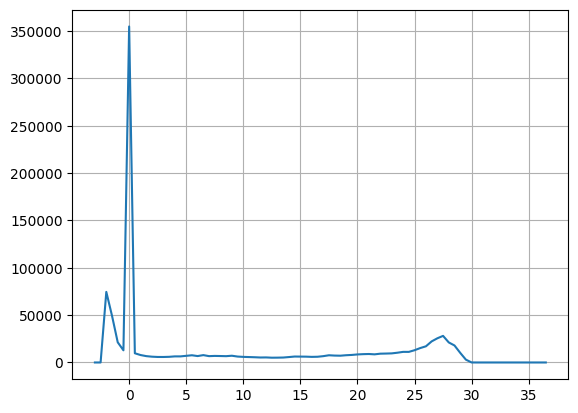

In [6]:
import numpy as np
import numpy.ma as ma

tmask = ma.masked_array(mean < -3)
indices = tmask.nonzero()
print("mask count ",len(indices[0]))

nbins = 80
hist,binedges = np.histogram(mean, bins = nbins, range = [-3,37] )
#debug: 
print(hist)
#debug: 
print(binedges, flush=True)

fig,ax = plt.subplots()
plt.grid(visible=True)
ax.plot(binedges[0:nbins], hist)
plt.show()
plt.close()

[546542  16823  15851  14433  11387  10038   9134   8810   7782   7074
   6175   5619   4979   4889   4587   4158   4180   4319   4411   4589
   4845   4667   4516   4249   4151   4157   4441   4745   4909   4572
   4254   4324   4406   4492   4635   4864   4745   4891   4744   4765
   4690   4735   4691   4624   4863   4762   4780   4787   4789   4889
   5030   5050   5514   5247   5128   5384   5771   6304   7040   6748
   7010   7806   8733   9976   9894  10240  11640  12523  11208   8757
   8394   8747   8027   6450   5878   3987   2755   2312    425     60]
[  0.          11.31962697  22.63925395  33.95888092  45.27850789
  56.59813486  67.91776184  79.23738881  90.55701578 101.87664275
 113.19626973 124.5158967  135.83552367 147.15515065 158.47477762
 169.79440459 181.11403156 192.43365854 203.75328551 215.07291248
 226.39253946 237.71216643 249.0317934  260.35142037 271.67104735
 282.99067432 294.31030129 305.62992826 316.94955524 328.26918221
 339.58880918 350.90843616 362.2280

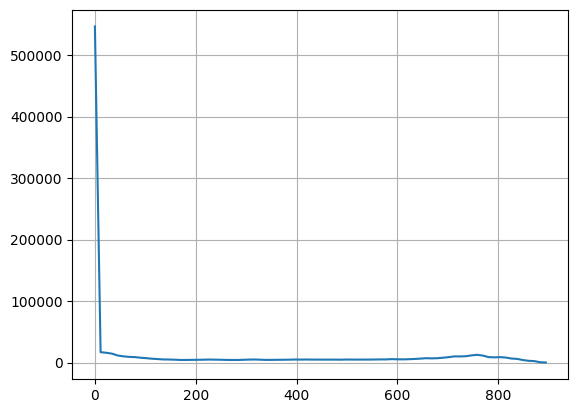

In [8]:
nbins = 80
hist,binedges = np.histogram(mean2, bins = nbins, range = [0,mean2.max() ])

#debug: 
print(hist)
#debug: 
print(binedges, flush=True)

fig,ax = plt.subplots()
plt.grid(visible=True)
ax.plot(binedges[0:nbins], hist)
plt.show()
plt.close()

[591876  26627  17977  13172  10188   8009   7155   6122   6069   5886
   5935   5596   5329   5257   5016   5230   5535   5653   4807   4503
   4582   4621   4601   4761   4827   4798   4869   4435   4461   4347
   4343   4476   4353   4229   4329   4326   4273   4193   4161   4177
   4239   4236   4449   4574   4362   4136   4336   4663   4592   5362
   5640   5271   5355   5726   6157   6561   7420   7540   7650   7565
   8032   9805   8568   8140   6807   6021   6027   6383   6169   5028
   4571   4087   3821   2631   1911   2020   1334    408     59     40] [-5.35417824e+00  3.35631905e+02  6.76617988e+02  1.01760407e+03
  1.35859015e+03  1.69957624e+03  2.04056232e+03  2.38154840e+03
  2.72253449e+03  3.06352057e+03  3.40450665e+03  3.74549273e+03
  4.08647882e+03  4.42746490e+03  4.76845098e+03  5.10943707e+03
  5.45042315e+03  5.79140923e+03  6.13239532e+03  6.47338140e+03
  6.81436748e+03  7.15535356e+03  7.49633965e+03  7.83732573e+03
  8.17831181e+03  8.51929790e+03  8.86028

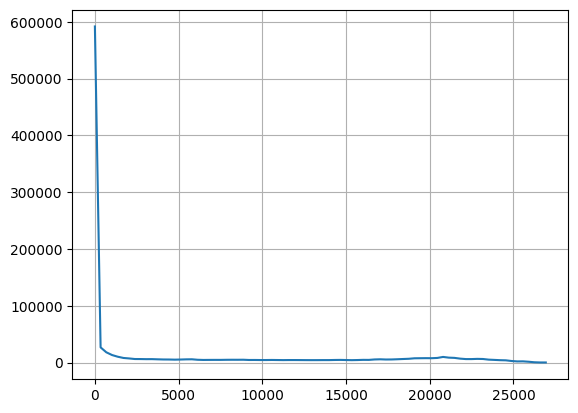

In [11]:
nbins = 80
hist, binedges = np.histogram(mean3, bins = nbins)
print(hist, binedges)

fig,ax = plt.subplots()
plt.grid(visible=True)
ax.plot(binedges[0:nbins], hist)
plt.show()
plt.close()

[633301  23998  14238  10228   9188   8430   7490   6653   6423   6928
   7048   6231   5552   5366   5260   5300   5277   5335   5262   4904
   4690   4474   4531   4535   4476   4441   4256   4278   4252   4158
   4058   4011   4000   3996   4033   4338   4087   3863   3841   4037
   4129   4157   4677   5090   4791   4693   4756   5051   5321   5643
   6186   6694   6461   6366   6178   7079   8030   6969   6796   6223
   5300   4800   4905   5223   4831   4842   3868   3678   3246   3188
   2809   2020   1602   1404   1615    883    371     91     37     30] [     0.          10273.31310788  20546.62621575  30819.93932363
  41093.25243151  51366.56553938  61639.87864726  71913.19175514
  82186.50486301  92459.81797089 102733.13107877 113006.44418664
 123279.75729452 133553.0704024  143826.38351027 154099.69661815
 164373.00972603 174646.3228339  184919.63594178 195192.94904966
 205466.26215753 215739.57526541 226012.88837329 236286.20148116
 246559.51458904 256832.82769692 267106.1

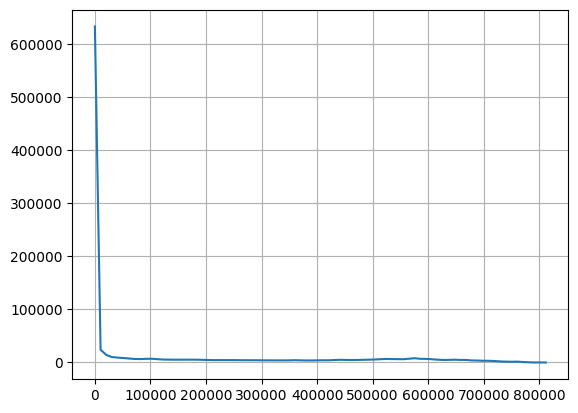

In [12]:
nbins = 80
hist, binedges = np.histogram(mean4, bins = nbins)
print(hist, binedges)

fig,ax = plt.subplots()
plt.grid(visible=True)
ax.plot(binedges[0:nbins], hist)
plt.show()
plt.close()

9.365189412241369 0.0
[349950  41086  29903  14881  12545  20886  33789  44924  51315  49832
  41910  34296  33183  28568  27465  24151  22479  21279  21406  21868
  16554  13140  10691   7889   7887   6931   5359   4676   4717   4039
   3367   2379   1893   1905   1560   1637   1498   1559   1030    907
    891    813    747    815    819    916    924    871    791    583
    420    333    311    250    238    204    208    236    137    101
     79    115     68     61     57     51     33     28     21     20
     35     32     39     42     39     42     58     31      3      4] [0.         0.11706487 0.23412974 0.3511946  0.46825947 0.58532434
 0.70238921 0.81945407 0.93651894 1.05358381 1.17064868 1.28771354
 1.40477841 1.52184328 1.63890815 1.75597301 1.87303788 1.99010275
 2.10716762 2.22423249 2.34129735 2.45836222 2.57542709 2.69249196
 2.80955682 2.92662169 3.04368656 3.16075143 3.27781629 3.39488116
 3.51194603 3.6290109  3.74607576 3.86314063 3.9802055  4.09727037
 4.2143

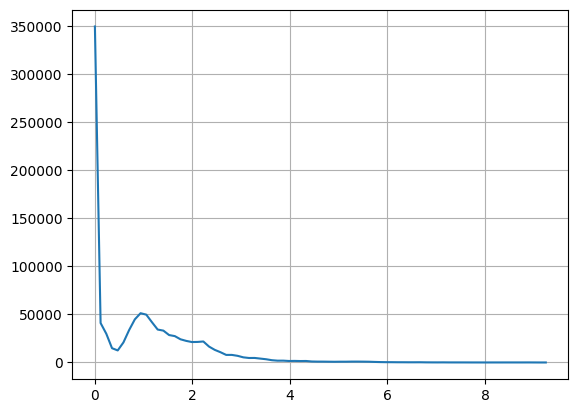

[     3      2     10     12     19     43     74    138    522   1732
 874451  48821  17180  12493   8011   7046   6622   6620   6056   5581
   4572   3887   3453   2876   2469   2355   2222   1846   1663   1470
   1264   1134   1034    975    953   1078   1033    757    594    633
    524    495    514    510    442    379    414    389    342    228
    194    164    151     89     69     35     38     24     29     16
     12     10      5      9      2      1      2      1      0      1
      0      0      0      0      0      1      1      0      1      4] [-0.42366402 -0.38395327 -0.34424252 -0.30453178 -0.26482103 -0.22511028
 -0.18539954 -0.14568879 -0.10597804 -0.0662673  -0.02655655  0.01315419
  0.05286494  0.09257569  0.13228643  0.17199718  0.21170793  0.25141867
  0.29112942  0.33084017  0.37055091  0.41026166  0.4499724   0.48968315
  0.5293939   0.56910464  0.60881539  0.64852614  0.68823688  0.72794763
  0.76765838  0.80736912  0.84707987  0.88679061  0.92650136  0.96

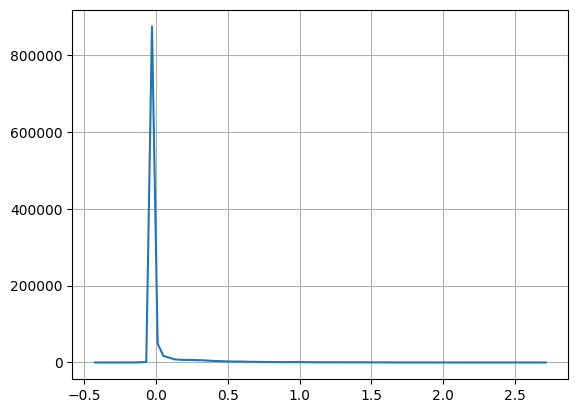

In [21]:
var = mean2 - mean**2
sd = np.sqrt(var)
print(sd.max(), sd.min() )

hist,binedges = np.histogram(sd, bins = nbins)
print(hist, binedges)
fig,ax = plt.subplots()
plt.grid(visible=True)
ax.plot(binedges[0:nbins], hist)
plt.show()
plt.close()

#
skew = mean3 - 3.*mean*mean2 + 2.*(mean)**3
skew /= mean2**1.5

nbins = 80
hist, binedges = np.histogram(skew, bins = nbins)
print(hist, binedges)

fig,ax = plt.subplots()
plt.grid(visible=True)
ax.plot(binedges[0:nbins], hist)
plt.show()
plt.close()

[584286  19673  10951   8335   7941   6479   5131   4182   3650   3413
   3460   3364   3360   3299   3182   3102   2713   2170   1778   1534
   1132    958 346559    760    639    710    630    506    516    352
    356    254    214    175    142    142     80     79     62     62
     51     41     35     34     30     26     14     20     19     16
     22     18     24     14     11     15     12     11      6      6
      6      8      8      1      2      5      0      3      1      1
      2      1      0      1      0      1      0      0      0      4] [-2.99999983 -2.86702456 -2.73404929 -2.60107403 -2.46809876 -2.33512349
 -2.20214822 -2.06917295 -1.93619768 -1.80322242 -1.67024715 -1.53727188
 -1.40429661 -1.27132134 -1.13834607 -1.00537081 -0.87239554 -0.73942027
 -0.606445   -0.47346973 -0.34049446 -0.2075192  -0.07454393  0.05843134
  0.19140661  0.32438188  0.45735715  0.59033241  0.72330768  0.85628295
  0.98925822  1.12223349  1.25520876  1.38818402  1.52115929  1.65

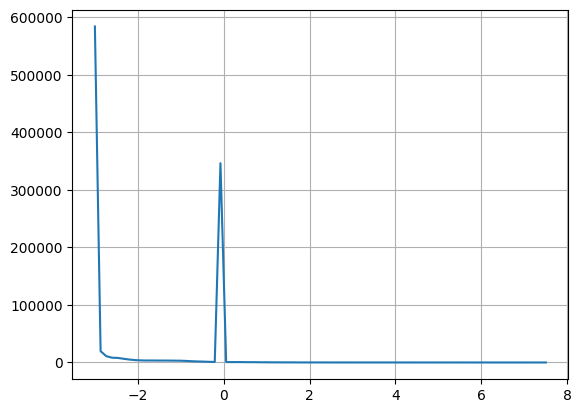

In [23]:
#kurtosis
mean1 = mean
kurtosis = mean4 - 4.*mean1*mean3 + 6.*mean1**2 * mean2 - 3.*mean1**4
kurtosis /= mean2**2
kurtosis -= 3 # kurtosis of gaussian curve, so this now gives excess or deficiency

hist,binedges = np.histogram(kurtosis, bins = nbins)
print(hist,binedges)

fig,ax = plt.subplots()
plt.grid(visible=True)
ax.plot(binedges[0:nbins], hist)
plt.show()
plt.close()

vmin max =  -1.7456438015585076 30.084437670773024


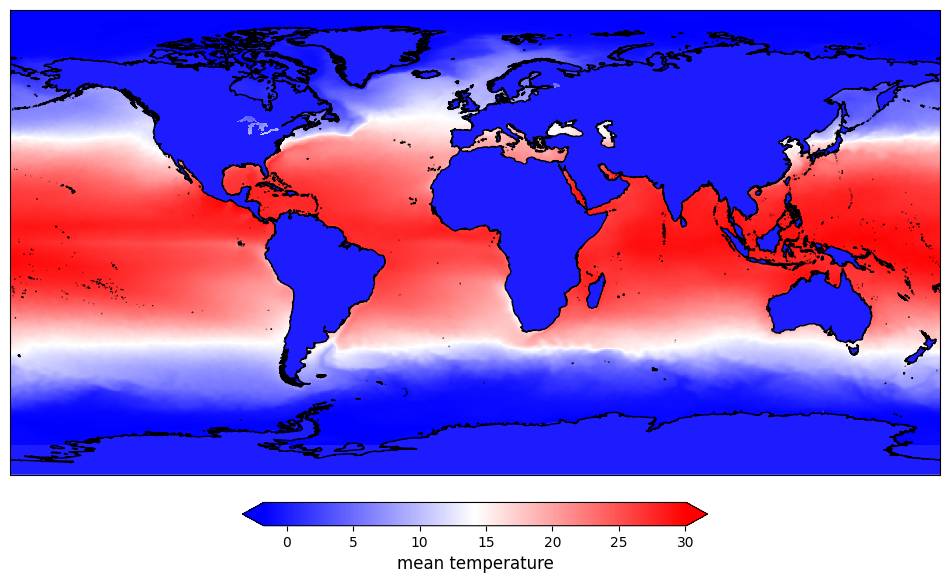

In [24]:
#plot the mean
proj = ccrs.PlateCarree()

# plot the mean -- remember we computed mean difference from the first grid seen:
vmin = max(-3,np.nanmin(mean))
vmax = np.nanmax(mean)
print("vmin max = ",vmin, vmax, flush=True)

#colors = matplotlib.colormaps.get_cmap('terrain')
#colors = matplotlib.colormaps.get_cmap('seismic')
colors = matplotlib.colormaps.get_cmap('bwr')

fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1, projection = proj)
ax.coastlines(resolution='10m')

cs = ax.pcolormesh(lons, lats, mean, vmin=vmin,vmax=vmax,cmap=colors, transform=ccrs.PlateCarree() )
cb = plt.colorbar(cs, extend='both', orientation='horizontal', shrink=0.5, pad=.04)
cbarlabel = '%s' % ("mean temperature")
cb.set_label(cbarlabel, fontsize=12)

plt.show()
plt.close()

vmin max =  0.0 9.365189412241369


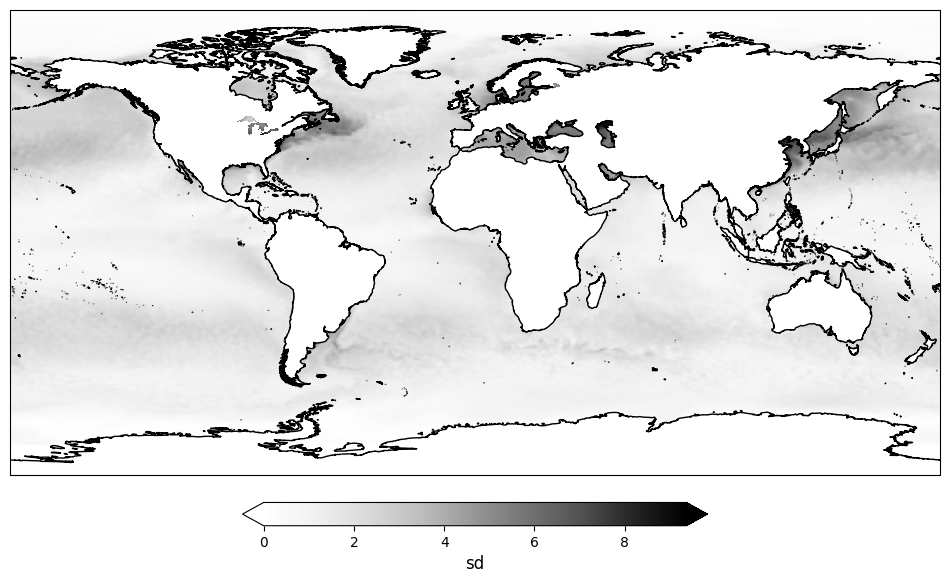

In [25]:
#plot sd

# sd
colors = matplotlib.colormaps.get_cmap('Greys')

fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1, projection = proj)
ax.coastlines(resolution='10m')

vmin = np.nanmin(sd)
vmax = np.nanmax(sd)
print("vmin max = ",vmin, vmax, flush=True)
cs = ax.pcolormesh(lons, lats, sd,vmin=vmin,vmax=vmax,cmap=colors, transform=ccrs.PlateCarree() )
cb = plt.colorbar(cs, extend='both', orientation='horizontal', shrink=0.5, pad=.04)
cbarlabel = '%s' % ("sd")
cb.set_label(cbarlabel, fontsize=12)

plt.show()
plt.close()

vmin max =  -0.4236640158567526 2.753195693834066


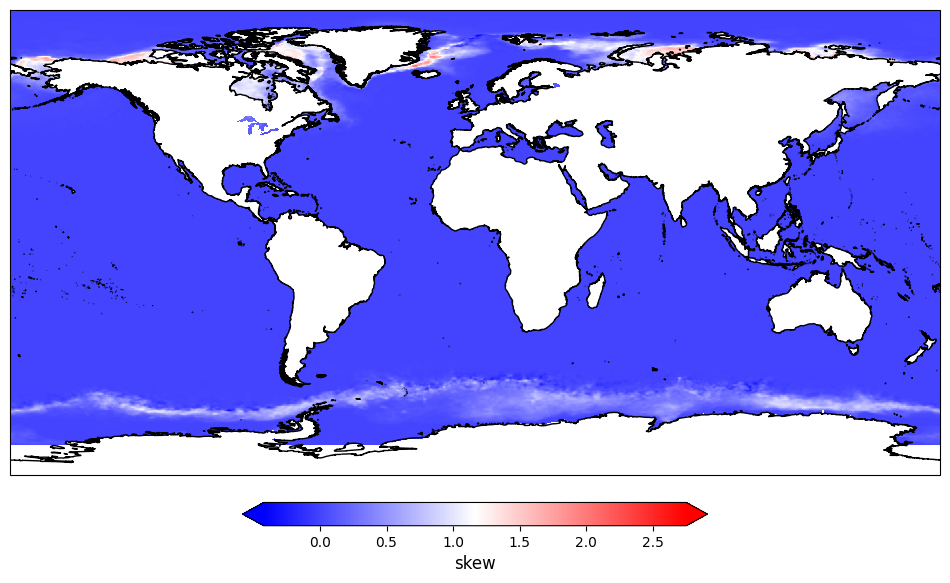

In [26]:
#skew (scaled)
colors = matplotlib.colormaps.get_cmap('bwr')

fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1, projection = proj)
ax.coastlines(resolution='10m')

vmin = np.nanmin(skew)
vmax = np.nanmax(skew)
print("vmin max = ",vmin, vmax, flush=True)
cs = ax.pcolormesh(lons, lats, skew,vmin=vmin,vmax=vmax,cmap=colors, transform=ccrs.PlateCarree() )
cb = plt.colorbar(cs, extend='both', orientation='horizontal', shrink=0.5, pad=.04)
cbarlabel = '%s' % ("skew")
cb.set_label(cbarlabel, fontsize=12)

plt.show()
plt.close()

vmin max =  -2.9999998308367686 7.63802163501181


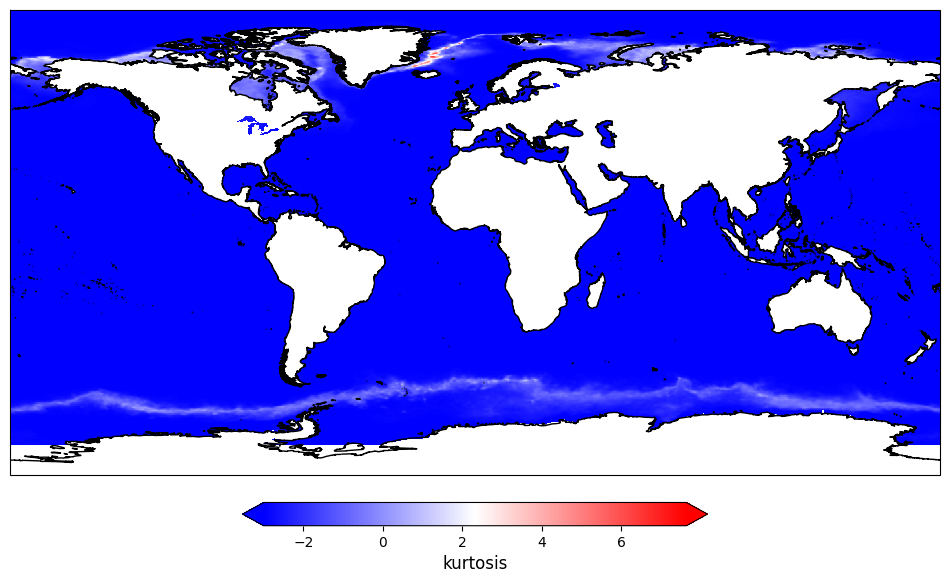

In [27]:
#kurtosis -- scaled and shifted
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1, projection = proj)
ax.coastlines(resolution='10m')

vmin = np.nanmin(kurtosis)
vmax = np.nanmax(kurtosis)
print("vmin max = ",vmin, vmax, flush=True)
cs = ax.pcolormesh(lons, lats, kurtosis,vmin=vmin,vmax=vmax,cmap=colors, transform=ccrs.PlateCarree() )
cb = plt.colorbar(cs, extend='both', orientation='horizontal', shrink=0.5, pad=.04)
cbarlabel = '%s' % ("kurtosis")
cb.set_label(cbarlabel, fontsize=12)

plt.show()
plt.close()

/var/folders/2d/0ghjf6hs3x993y90thd8nfpc0000gp/T/ipykernel_67339/785739071.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


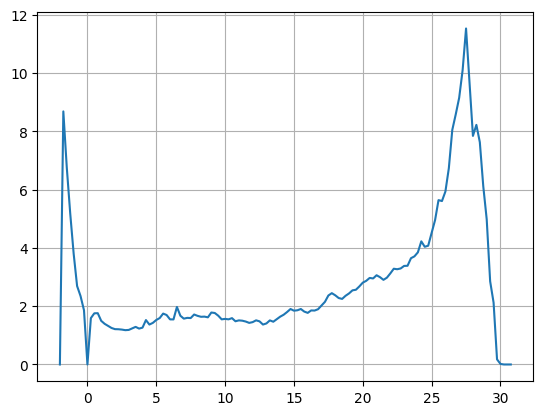

In [42]:
from math import *
area = np.zeros((ny,nx))
for i in range(0,ny):
    area[i,:] = cos(pi*lats[i]/180.)
cellarea = (111.1*111.1)/16./1.e6 # quarter degree grid

tmin = mean1.min()
tmax = mean1.max()
lower = floor(tmin)
upper = ceil(tmax)
#debug: print(tmin, tmax, lower, upper, flush=True)
delta = upper - lower
precision = 4
histogram = np.zeros(int(delta*precision))
bins = np.zeros(int(delta*precision))

for j in range(0,ny):
    for i in range(0,nx):
        histogram[ int((mean[j,i] - lower)*precision) ] += area[j,i]

for i in range(0, len(histogram)):
    bins[i] = lower + i/precision
    #debug: print(lower + i/precision, histogram[i])

#temporary kluge:
histogram[int((0.-lower)*precision)] = 0.0
histogram *= cellarea

fig,ax = plt.subplots()
ax.plot(bins, histogram)
ax.grid()
fig.show()


In [69]:
def show_histogram(x, cellarea, areas):

  lower = x.min()
  upper = x.max() 

  delta = upper - lower
  precision = 4
  histogram = np.zeros(int(delta*precision)+1)
  bins = np.zeros(int(delta*precision)+1)
  #debug: 
  print('histogram fn', lower, upper, delta, len(histogram), flush=True)
  errcount = 0
    
  for j in range(0,ny):
    for i in range(0,nx):
        try:
            histogram[ int((x[j,i] - lower)*precision) ] += areas[j,i]
        except:
            errcount += 1

  for i in range(0, len(histogram)):
    bins[i] = lower + i/precision
    #debug: print(lower + i/precision, histogram[i])

  #temporary kluge:
  histogram[int((0.-lower)*precision)] = 0.0
  histogram *= cellarea

  fig,ax = plt.subplots()
  ax.plot(bins, histogram)
  ax.grid()
  fig.show()

  del(histogram, bins)
  print("errcount = ",errcount)

histogram fn -1.7456438015585076 30.084437670773024 31.830081472331532 128


/var/folders/2d/0ghjf6hs3x993y90thd8nfpc0000gp/T/ipykernel_67339/346953163.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


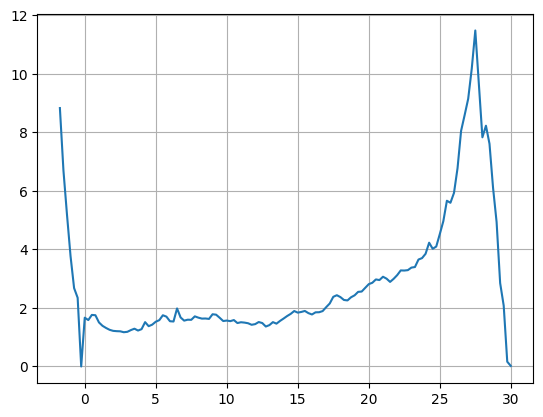

In [60]:
show_histogram(mean, cellarea, area)

histogram fn 0.0 9.365189412241369 9.365189412241369 38


/var/folders/2d/0ghjf6hs3x993y90thd8nfpc0000gp/T/ipykernel_67339/346953163.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


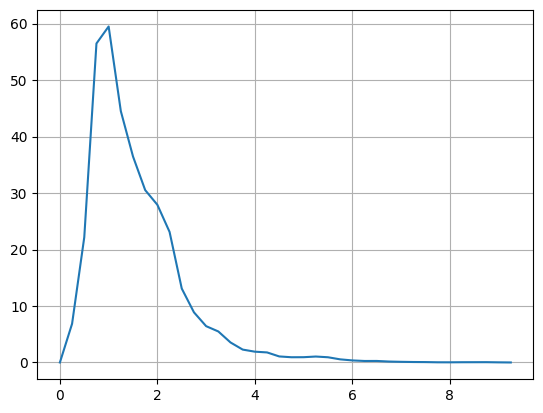

In [61]:
show_histogram(sd, cellarea, area)

histogram fn -0.4236640158567526 2.753195693834066 3.1768597096908184 13


/var/folders/2d/0ghjf6hs3x993y90thd8nfpc0000gp/T/ipykernel_67339/1198595125.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


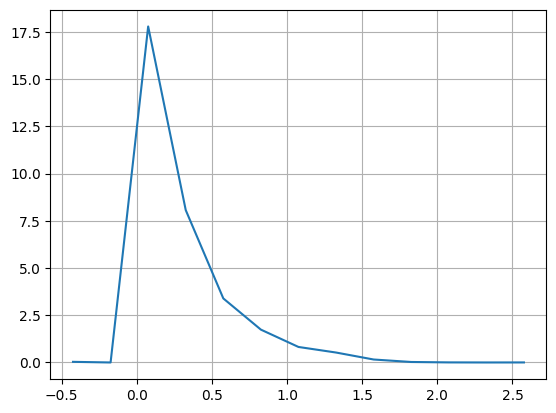

In [67]:
show_histogram(skew, cellarea, area)

histogram fn -2.9999998308367686 7.63802163501181 10.63802146584858 43
errcount =  345650


/var/folders/2d/0ghjf6hs3x993y90thd8nfpc0000gp/T/ipykernel_67339/3058002622.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


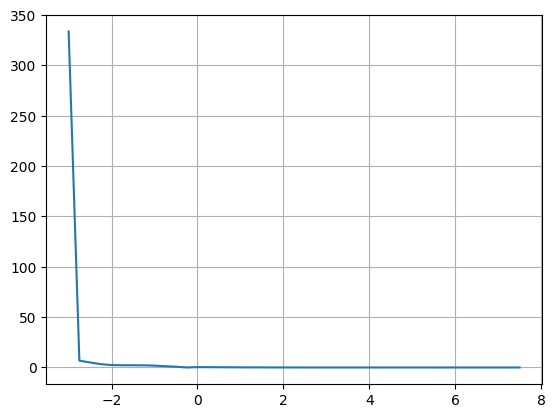

In [70]:
show_histogram(kurtosis, cellarea, area)